<a href="https://colab.research.google.com/github/octet07/task-4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1.Choose a binary classification dataset.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/AIML/breastcancer.csv")

# Cleaning and preprocessing the dataset
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Encode 'diagnosis' as binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Replace inf/-inf and drop NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Align target
print("Shape after cleaning:", X.shape, y.shape)
print(df.info())

Shape after cleaning: (569, 30) (569,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    

2. Train/test split and standardize features.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data preprocessing completed.")

Data preprocessing completed.


3.Fit a Logistic Regression model.

In [4]:
# Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

 4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.

Confusion Matrix:
 [[40  0]
 [ 1 16]]
Accuracy: 0.98
Precision: 1.00
Recall: 0.94
ROC-AUC: 1.00


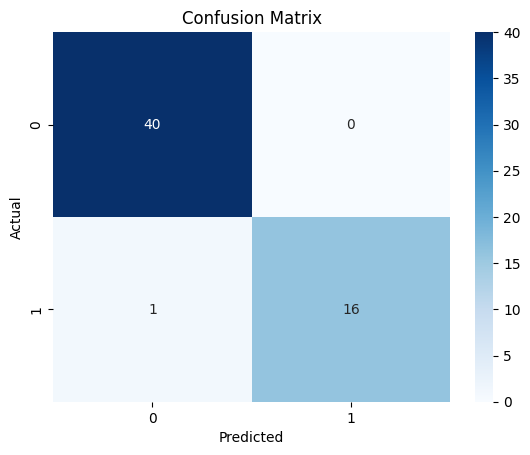

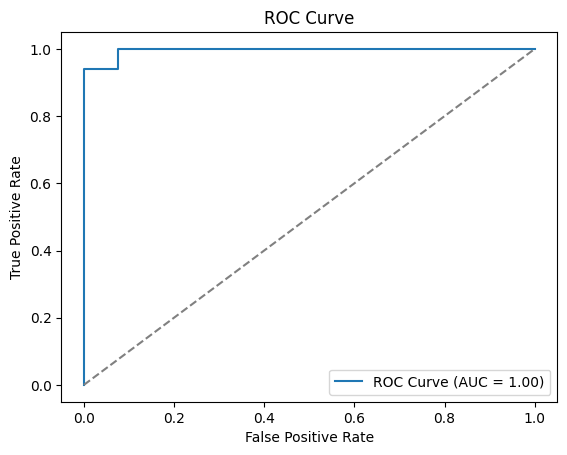

In [5]:
# Evaluate the Model
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

 5.Tune threshold and explain sigmoid function.

Confusion Matrix at threshold=0.4:
 [[40  0]
 [ 1 16]]


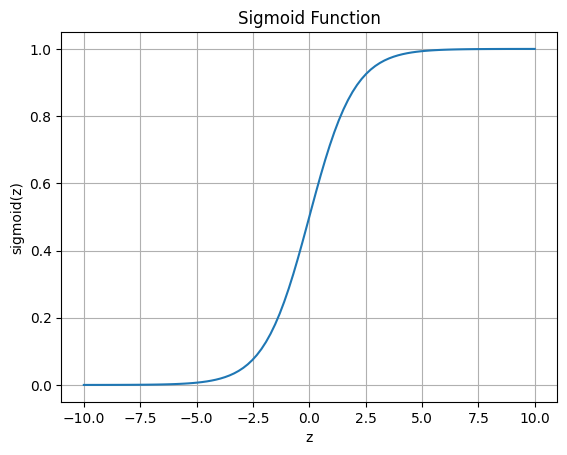

In [6]:
custom_threshold = 0.4
y_pred_custom = (y_prob >= custom_threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"Confusion Matrix at threshold={custom_threshold}:\n", cm_custom)

# Sigmoid Function Explanation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z_vals = np.linspace(-10, 10, 100)
sigmoid_vals = sigmoid(z_vals)
plt.plot(z_vals, sigmoid_vals)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()